In [1]:
#ref:https://colab.research.google.com/drive/13cSrVUBVvrVZzVG5PxRnb4KKd41I_8gg#scrollTo=pKuomnCGTcgR
#ref:https://github.com/irasin/Pytorch_AdaIN/
#ref:https://github.com/naoto0804/pytorch-AdaIN


import os
import io
import cv2
from PIL import Image
import imageio
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import clear_output
from IPython.display import HTML
from IPython import display as ipythondisplay
from IPython.display import Image as ipythonimage
%matplotlib inline

!git clone https://github.com/naoto0804/pytorch-AdaIN.git
%cd /content/pytorch-AdaIN

!mkdir models
%cd /content/pytorch-AdaIN/models
!gdown https://drive.google.com/uc?id=1bMfhMMwPeXnYSQI6cDWElSZxOxc6aVyr
!gdown https://drive.google.com/uc?id=1EpkBA2K2eYILDSyPTt0fztz59UjAIpZU
%cd /content

!pip3 install pillow
!pip3 install torchvision

!git clone https://github.com/irasin/Pytorch_Adain_from_scratch

Cloning into 'pytorch-AdaIN'...
remote: Enumerating objects: 323, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 323 (delta 62), reused 56 (delta 56), pack-reused 248
Receiving objects: 100% (323/323), 7.79 MiB | 42.88 MiB/s, done.
Resolving deltas: 100% (160/160), done.
/content/pytorch-AdaIN
/content/pytorch-AdaIN/models
Downloading...
From: https://drive.google.com/uc?id=1bMfhMMwPeXnYSQI6cDWElSZxOxc6aVyr
To: /content/pytorch-AdaIN/models/decoder.pth
100% 14.0M/14.0M [00:00<00:00, 64.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1EpkBA2K2eYILDSyPTt0fztz59UjAIpZU
To: /content/pytorch-AdaIN/models/vgg_normalised.pth
100% 80.1M/80.1M [00:01<00:00, 76.2MB/s]
/content
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Cloning into 'Pytorch_Adain_from_scratch'...
re

In [2]:
%cd /content/Pytorch_Adain_from_scratch
!gdown https://drive.google.com/u/1/uc?id=1fgYgsKLsxJHTV1QRtGeuyGgO2CEXCiqx&export=download
!gdown https://drive.google.com/u/1/uc?id=1Vm7fTGMSZAtS-rOhBXvH-YT7IrgPKupr&export=download
%cd /content/pytorch-AdaIN

/content/Pytorch_Adain_from_scratch
Downloading...
From: https://drive.google.com/u/1/uc?id=1fgYgsKLsxJHTV1QRtGeuyGgO2CEXCiqx
To: /content/Pytorch_Adain_from_scratch/model_state.pth
100% 28.1M/28.1M [00:00<00:00, 59.6MB/s]
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/u/1/uc?id=1Vm7fTGMSZAtS-rOhBXvH-YT7IrgPKupr 

/content/pytorch-AdaIN


In [3]:

!rm -rf video
!mkdir video
uploaded = list(files.upload().keys())

if len(uploaded) > 1:
  raise ValueError('You cannot upload more than one video at a time!')

vid = uploaded[0]
os.rename(vid, vid.replace(" ", ""))
vid = vid.replace(" ", "")
!mv -f $vid video/driving.mp4
vid = '/content/pytorch-AdaIN/video/driving.mp4'

frames_of_video = int(cv2.VideoCapture(vid).get(cv2.CAP_PROP_FRAME_COUNT))

Saving video_1.mp4 to video_1.mp4


First frame:



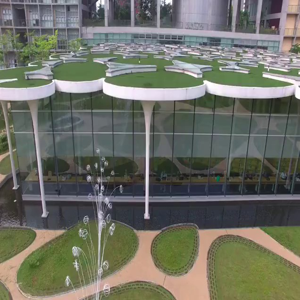

In [4]:
!rm -rf frames
!mkdir frames

frames_of_video = int(cv2.VideoCapture(vid).get(cv2.CAP_PROP_FRAME_COUNT))
vidcap = cv2.VideoCapture(vid)
success,image = vidcap.read()
count = 0
success = True
while success:
  cv2.imwrite("frames/frame%09d.jpg" % count, image)
  success,image = vidcap.read()
  count += 1

frames = []
fram = os.listdir("/content/pytorch-AdaIN/frames")
fram.sort()

fram_path = '/content/pytorch-AdaIN/frames/' + fram[0]
print("First frame:\n")
display(Image.open(fram_path).resize((300, 300)))

Saving la_muse.jpg to la_muse.jpg
User uploaded file "la_muse.jpg" with length 603579 bytes


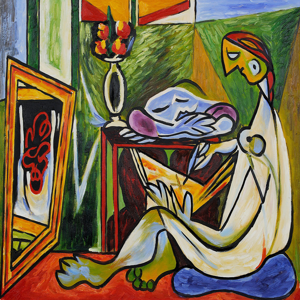

In [5]:
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
os.rename(fn, fn.replace(" ", ""))
fn = fn.replace(" ", "")
pic_name = "photo." + fn.split(".")[-1]
!mv -f $fn $pic_name

display(Image.open(pic_name).resize((300, 300)))

In [6]:
%%time
!rm -rf stylized_frames
!mkdir stylized_frames

im = Image.open(fram_path)
(width, height) = im.size
min_size_cont = min(width, height)

im = Image.open(pic_name)
(width, height) = im.size
min_size_styl = min(width, height)

temp_path = '/content/pytorch-AdaIN/frames'
output_path = '/content/pytorch-AdaIN/stylized_frames'


!CUDA_VISIBLE_DEVICES=0 python test.py --content_dir $temp_path --style $pic_name --output $output_path --content_size $min_size_cont --style_size $min_size_styl

#%cd /content/pytorch-AdaIN/frames
#!for FILE in *; do python3 /content/Pytorch_Adain_from_scratch/our_test.py -c $FILE -s /content/pytorch-AdaIN/photo.jpg --model_state_path /content/Pytorch_Adain_from_scratch/model_state.pth ; done



CPU times: user 564 ms, sys: 104 ms, total: 668 ms
Wall time: 1min 50s


In [7]:
%cd /content/pytorch-AdaIN/stylized_frames
#!pip3 install ffmpeg
!ffmpeg -r 60 -pattern_type glob -i '*.jpg' -c:v libx264 /content/pytorch-AdaIN/out.mp4


/content/pytorch-AdaIN/stylized_frames
ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enab